## 案例三：婴儿每年出生人数

sex,F,M
year,,
1880,0.45,0.55
1881,0.48,0.52
1882,0.49,0.51
1883,0.52,0.48
1884,0.53,0.47
...,...,...
2006,0.48,0.52
2007,0.48,0.52
2008,0.48,0.52


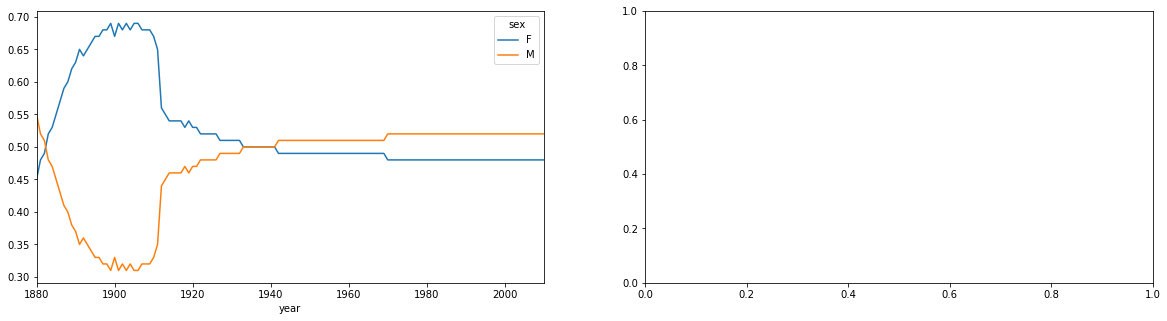

In [24]:
# 读csv文件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 5))

f1880 = 'datasets/babynames/yob1880.txt'
'''
names参数：标题列表
'''
pd.read_csv(f1880, names=['name', 'sex', 'num'])

# 循环读写每个文件
years = np.arange(1880, 2011)
# DataFrame对象列表
dfs = []
for year in years:
    # 使用%格式化字符串，%d表示数字，%f表示浮点数
    file = 'datasets/babynames/yob%d.txt' % year
    # 读每隔一个csv文件
    df = pd.read_csv(file, names=['name', 'sex', 'num'])
    
    df['year'] = year
    # 添加到一个列表中
    dfs.append(df)
# 对DataFrame对象列表进行聚合，这里的DataFrame是同构（拥有相同列）
df2 = pd.concat(dfs)
# 透视表函数：以年为索引，以性别为列，对人数求和
# 统计每年的男女出生人数
df3 = df2.pivot_table('num', index='year', columns=['sex'], aggfunc=sum)
# 统计每年男女占总人数的百分比
def func_percent(x):
    return np.around(x / x.sum(), 2)
df4 = df3.apply(func_percent, axis = 1)

# 绘制图形
fig, axes = plt.subplots(1, 2)
df4.plot.line(ax=axes[0])

In [65]:
print(df2.head())
df5 = df2.pivot_table('num', index='name', columns=['year'], aggfunc=sum)
df5[1880].sort_values(ascending=False)
df5.fillna(0, inplace=True)
# 1. 指定某些列，通过新建DataFrame对象
# df6 = pd.DataFrame(df5, columns=np.arange(2001,2011))
# df6.fillna(0)
# 2. 调用reindex重新索引，不用重新创建对象
df5.reindex(columns=np.arange(2001,2011))


# 统计每个名字在当年的对应性别总人数的比例
def fuc_per(x):
    x['per'] = x['num'] / x['num'].sum()
    return x
df6 = df2.groupby(['year', 'sex']).apply(fuc_per)

'''
name   2018 2019 
Mary   
'''
df7 = df6.sort_values(by='per')
df8 = df7[df7['per'] > 0.05]
df8.pivot_table('num', index='year', columns=['name'], aggfunc=sum)

        name sex   num  year
0       Mary   F  7065  1880
1       Anna   F  2604  1880
2       Emma   F  2003  1880
3  Elizabeth   F  1939  1880
4     Minnie   F  1746  1880


name,James,John,Linda,Mary,Robert,William
year,,,,,,
1880,5927.0,9655.0,NaN,7065.0,NaN,9533.0
1881,5442.0,8769.0,NaN,6919.0,NaN,8524.0
1882,5892.0,9557.0,NaN,8149.0,NaN,9298.0
1883,NaN,8894.0,NaN,8012.0,NaN,8387.0
1884,NaN,9387.0,NaN,9217.0,NaN,8897.0
...,...,...,...,...,...,...
1945,74475.0,NaN,NaN,NaN,69966.0,NaN
1946,87382.0,NaN,NaN,NaN,84053.0,NaN
1947,94601.0,NaN,99651.0,NaN,91557.0,NaN
